# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [4]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [5]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [6]:
cloud_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'cloudy' in i]
rain_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'rain' in i]
sunrise_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'sunrise' in i]
sunshine_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'shine' in i]

In [7]:
cloud_set

['weather_data/cloudy126.jpg',
 'weather_data/cloudy132.jpg',
 'weather_data/cloudy23.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy250.jpg',
 'weather_data/cloudy244.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy287.jpg',
 'weather_data/cloudy286.jpg',
 'weather_data/cloudy292.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy245.jpg',
 'weather_data/cloudy251.jpg',
 'weather_data/cloudy36.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy133.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy20.jpg',
 'weather_data/cloudy247.jpg',
 'weather_data/cloudy253.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy290.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/clo

In [8]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [9]:
cloud_set

['weather_data/cloudy294.jpg',
 'weather_data/cloudy58.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy225.jpg',
 'weather_data/cloudy97.jpg',
 'weather_data/cloudy122.jpg',
 'weather_data/cloudy240.jpg',
 'weather_data/cloudy186.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy55.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy102.jpg',
 'weather_data/cloudy94.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy255.jpg',
 'weather_data/cloudy171.jpg',
 'weather_data/cloudy173.jpg',
 'weather_data/cloudy150.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy157.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/cloudy11.jpg',
 'weather_data/cloudy232.jpg',
 'weather_data/cloudy81.jpg',
 'weather_data/cloudy188.jpg',
 'weather_data/cloudy21.jpg',
 'weather_data/cloudy39.jpg',
 'weather_data/cloudy164.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy65.jpg',
 'weather_data/cloudy75.jpg',
 'weather_data/cloudy169.jpg',
 'weather_data/cloudy4

In [10]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [11]:
train_set

['weather_data/cloudy294.jpg',
 'weather_data/cloudy58.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy225.jpg',
 'weather_data/cloudy97.jpg',
 'weather_data/cloudy122.jpg',
 'weather_data/cloudy240.jpg',
 'weather_data/cloudy186.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy55.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy102.jpg',
 'weather_data/cloudy94.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy255.jpg',
 'weather_data/cloudy171.jpg',
 'weather_data/cloudy173.jpg',
 'weather_data/cloudy150.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy157.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/cloudy11.jpg',
 'weather_data/cloudy232.jpg',
 'weather_data/cloudy81.jpg',
 'weather_data/cloudy188.jpg',
 'weather_data/cloudy21.jpg',
 'weather_data/cloudy39.jpg',
 'weather_data/cloudy164.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy65.jpg',
 'weather_data/cloudy75.jpg',
 'weather_data/cloudy169.jpg',
 'weather_data/cloudy4

In [12]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

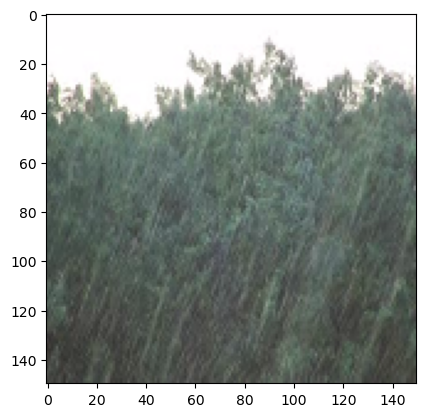

In [13]:
# Display some images
idx = 200
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

NameError: name 'y' is not defined

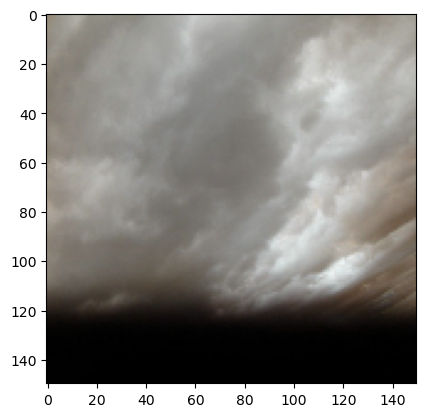

In [14]:
# Display some images
idx = 13
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
print(y)

In [15]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  weather_data/shine131.jpg


In [16]:
X_train[1].shape

(150, 150, 3)

<Axes: ylabel='count'>

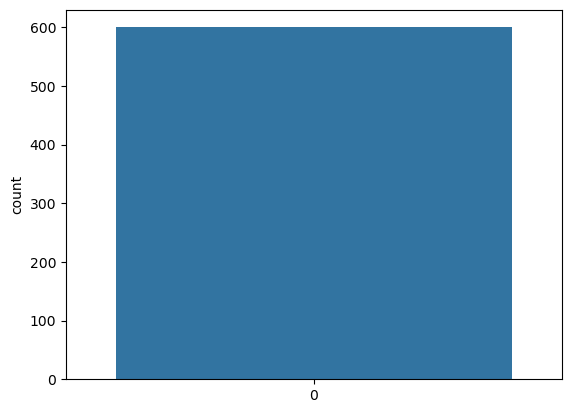

In [17]:
sns.countplot(y_train)

In [18]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


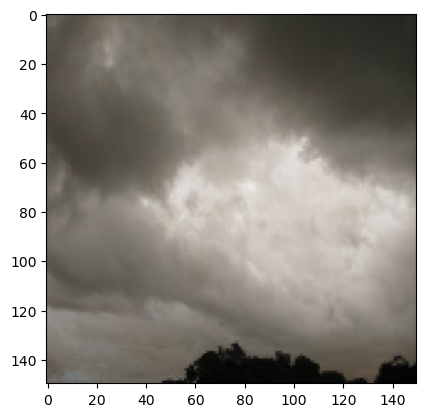

In [20]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [ ]:
# Define your model here
from keras.models import Sequential
from keras import layers

## Model 1

In [38]:
Model_1 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_1.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = Model_1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=64)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 124)  │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,877 (4.91 MB)

 Trainable params: 1,285,877 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2487 - loss: 30.6207 - val_accuracy: 0.5564 - val_loss: 1.2355
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4540 - loss: 2.1838 - val_accuracy: 0.7495 - val_loss: 0.7222
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6642 - loss: 0.8694 - val_accuracy: 0.8107 - val_loss: 0.5987
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8020 - loss: 0.6508 - val_accuracy: 0.7839 - val_loss: 0.5457
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8013 - loss: 0.5724 - val_accuracy: 0.8337 - val_loss: 0.5003
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8682 - loss: 0.4229 - val_accuracy: 0.8662 - val_loss: 0.4329
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8547 - loss: 0.3736 - val_accuracy: 0.8413 - val_loss: 0.4605
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8981 - loss: 0.3017 - val_accuracy: 0.8795 - val

## Model 2


### Plot learning Curves

***Type your code here***

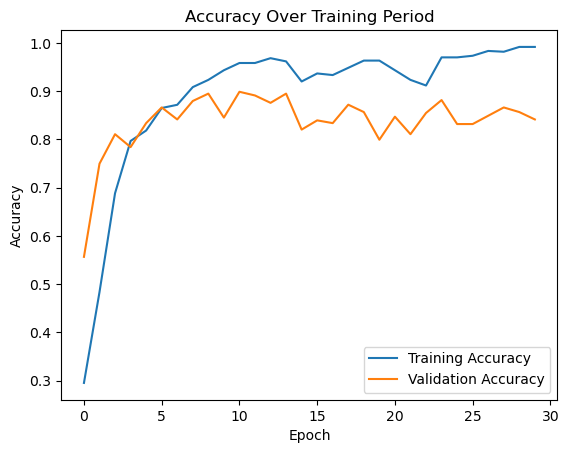

In [39]:
# Plot training and validation accuracy
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(history.history['loss'],label='Loss')
# plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Period')
plt.legend()
plt.show()

### Evaluating the model out-of-sample

In [26]:
# Type your code here
test_loss, test_acc = Model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7781 - loss: 0.6831
Test accuracy: 0.665


### Comment on your results

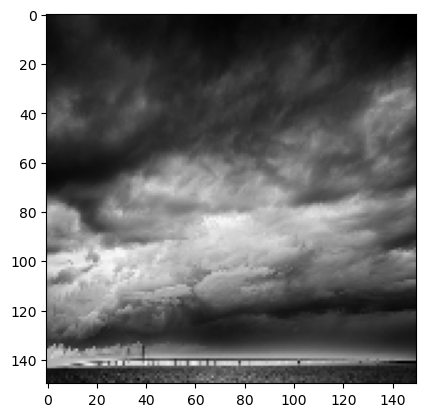

In [27]:
# Display some images
idx = 1
image = train_set[idx]
# image = "weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [28]:
import numpy as np
from PIL import Image
image = Image.open(image).resize((150, 150))  # Resize the image to 150x150 pixels
image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image = np.expand_dims(image, axis=0)

In [29]:
predicted_probabilities = Model_1.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [30]:
predicted_probabilities

array([[0.17701294, 0.21000867, 0.20637268, 0.20268704, 0.2039186 ]],
      dtype=float32)

In [31]:
predicted_class = np.argmax(predicted_probabilities)
print(f"Predicted class: {predicted_class}")

Predicted class: 1
